In [1]:
!pip install pandas

In [2]:
import csv
import time
import io
import pandas as pd
import os

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
OUTPUT_DATA_C_FILE="output_data_c.csv"
OUTPUT_DATA_C_OTHERS_FILE="output_data_c_others_all.csv"
OUTPUT_DATA_C_FILEPATH = os.path.join(PROJECT_ROOT_DIR, "data", OUTPUT_DATA_C_FILE)
OUTPUT_DATA_C_OTHERS_FILEPATH = os.path.join(PROJECT_ROOT_DIR, "data", OUTPUT_DATA_C_FILE)

IMAGE_OUTPUT_DIRECTORY = os.path.join(PROJECT_ROOT_DIR, "plots");

In [4]:

with open(OUTPUT_DATA_C_FILEPATH) as f1:
    reader1 = csv.reader(f1)
    my_list_c = list(reader1)
with open(OUTPUT_DATA_C_OTHERS_FILEPATH) as f2:
    reader2 = csv.reader(f2)
    my_list_c_o = list(reader2)

# Cardiovascular—overall analysis

In [5]:
dif1 =[]
no_agree = 0
no_contra_agree = 0
no_major_agree = 0
no_modera_agree = 0
no_minor_agree = 0
no_notfou_agree = 0
for i in range(0, len(my_list_c)):
    integer_value_1 = ord(my_list_c[i][5]) - ord('0')
    integer_value_2 = ord(my_list_c[i][6]) - ord('0')
    dif = abs(integer_value_1 - integer_value_2)
    dif1.append(dif)
    if my_list_c[i][5] == my_list_c[i][6]:
        no_agree = no_agree + 1
        if my_list_c[i][5] == '4':
            no_contra_agree = no_contra_agree + 1
        elif my_list_c[i][5] == '3':
            no_major_agree = no_major_agree + 1
        elif my_list_c[i][5] == '2':
            no_modera_agree = no_modera_agree + 1
        elif my_list_c[i][5] == '1':
            no_minor_agree = no_minor_agree + 1
        else:
            no_notfou_agree = no_notfou_agree + 1
print("Agreement: ", dif1.count(0)) 
print("Mild agreement: ", dif1.count(1))  
print("Mild disagreement: ", dif1.count(2))  
print("Disagreement: ", dif1.count(3))
print("Strong disagreement: ", dif1.count(4))  
print("Number of interactions: ", len(dif1))
print("Number of agreements: ", no_agree)
print("Agreements of contraindicated: ", no_contra_agree, " representing ", (no_contra_agree * 100)/no_agree, "%")
print("Agreements of major: ", no_major_agree, " representing ", (no_major_agree * 100)/no_agree, "%")
print("Agreements of moderate: ", no_modera_agree, " representing ", (no_modera_agree * 100)/no_agree, "%")
print("Agreements of minor: ", no_minor_agree, " representing ", (no_minor_agree * 100)/no_agree, "%")
print("Agreements of not found: ", no_notfou_agree, " representing ", (no_notfou_agree * 100)/no_agree, "%")

Agreement:  6056
Mild agreement:  337
Mild disagreement:  1162
Disagreement:  77
Strong disagreement:  27
Number of interactions:  7659
Number of agreements:  6056
Agreements of contraindicated:  12  representing  0.19815059445178335 %
Agreements of major:  52  representing  0.8586525759577279 %
Agreements of moderate:  508  representing  8.388375165125495 %
Agreements of minor:  8  representing  0.13210039630118892 %
Agreements of not found:  5476  representing  90.4227212681638 %


# Cardiovascular—categorial analysis

In [6]:
cardio_list = ['C01', 'C02', 'C03', 'C04', 'C07', 'C08', 'C09', 'C10']
for i in cardio_list:
    for j in cardio_list:
        if (i<j):
            print ("Between ", i, " and ", j)
            no_interactions = 0
            no_contra_agree = 0
            no_major_agree = 0
            no_modera_agree = 0
            no_minor_agree = 0
            no_notfou_agree = 0
            no_disagreement = 0
            for k in range(0, len(my_list_c)):
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5]=='4' and my_list_c[k][6]=='4'):
                    no_contra_agree = no_contra_agree + 1
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5]=='3' and my_list_c[k][6]=='3'):
                    no_major_agree = no_major_agree + 1
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5]=='2' and my_list_c[k][6]=='2'):
                    no_modera_agree = no_modera_agree + 1
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5]=='1' and my_list_c[k][6]=='1'):
                    no_minor_agree = no_minor_agree + 1
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5]=='0' and my_list_c[k][6]=='0'):
                    no_notfou_agree = no_notfou_agree + 1   
                if (my_list_c[k][1]== j and my_list_c[k][3]== i and my_list_c[k][5] != my_list_c[k][6]):
                    no_disagreement = no_disagreement + 1
            no_interactions = no_contra_agree + no_major_agree + no_modera_agree + no_minor_agree + no_notfou_agree + no_disagreement
            print ("Number of interactions: ", no_interactions)
            print ("Number of contraindicated agreements: ", no_contra_agree, " meaning ", (no_contra_agree * 100)/no_interactions,"%")
            print ("Number of major agreements: ", no_major_agree, " meaning ", (no_major_agree * 100)/no_interactions,"%")
            print ("Number of moderate agreements: ", no_modera_agree, " meaning ", (no_modera_agree * 100)/no_interactions,"%")
            print ("Number of minor agreements: ", no_minor_agree, " meaning ", (no_minor_agree * 100)/no_interactions,"%")
            print ("Number of not found agreements: ", no_notfou_agree, " meaning ", (no_notfou_agree * 100)/no_interactions,"%")
            print ("Number of disagreements: ", no_disagreement, " meaning ", (no_disagreement * 100)/no_interactions,"%")
            

Between  C01  and  C02
Number of interactions:  506
Number of contraindicated agreements:  0  meaning  0.0 %
Number of major agreements:  0  meaning  0.0 %
Number of moderate agreements:  8  meaning  1.5810276679841897 %
Number of minor agreements:  0  meaning  0.0 %
Number of not found agreements:  438  meaning  86.56126482213439 %
Number of disagreements:  60  meaning  11.857707509881424 %
Between  C01  and  C03
Number of interactions:  690
Number of contraindicated agreements:  2  meaning  0.2898550724637681 %
Number of major agreements:  1  meaning  0.14492753623188406 %
Number of moderate agreements:  28  meaning  4.057971014492754 %
Number of minor agreements:  1  meaning  0.14492753623188406 %
Number of not found agreements:  530  meaning  76.81159420289855 %
Number of disagreements:  128  meaning  18.55072463768116 %
Between  C01  and  C04
Number of interactions:  184
Number of contraindicated agreements:  0  meaning  0.0 %
Number of major agreements:  0  meaning  0.0 %
Number 

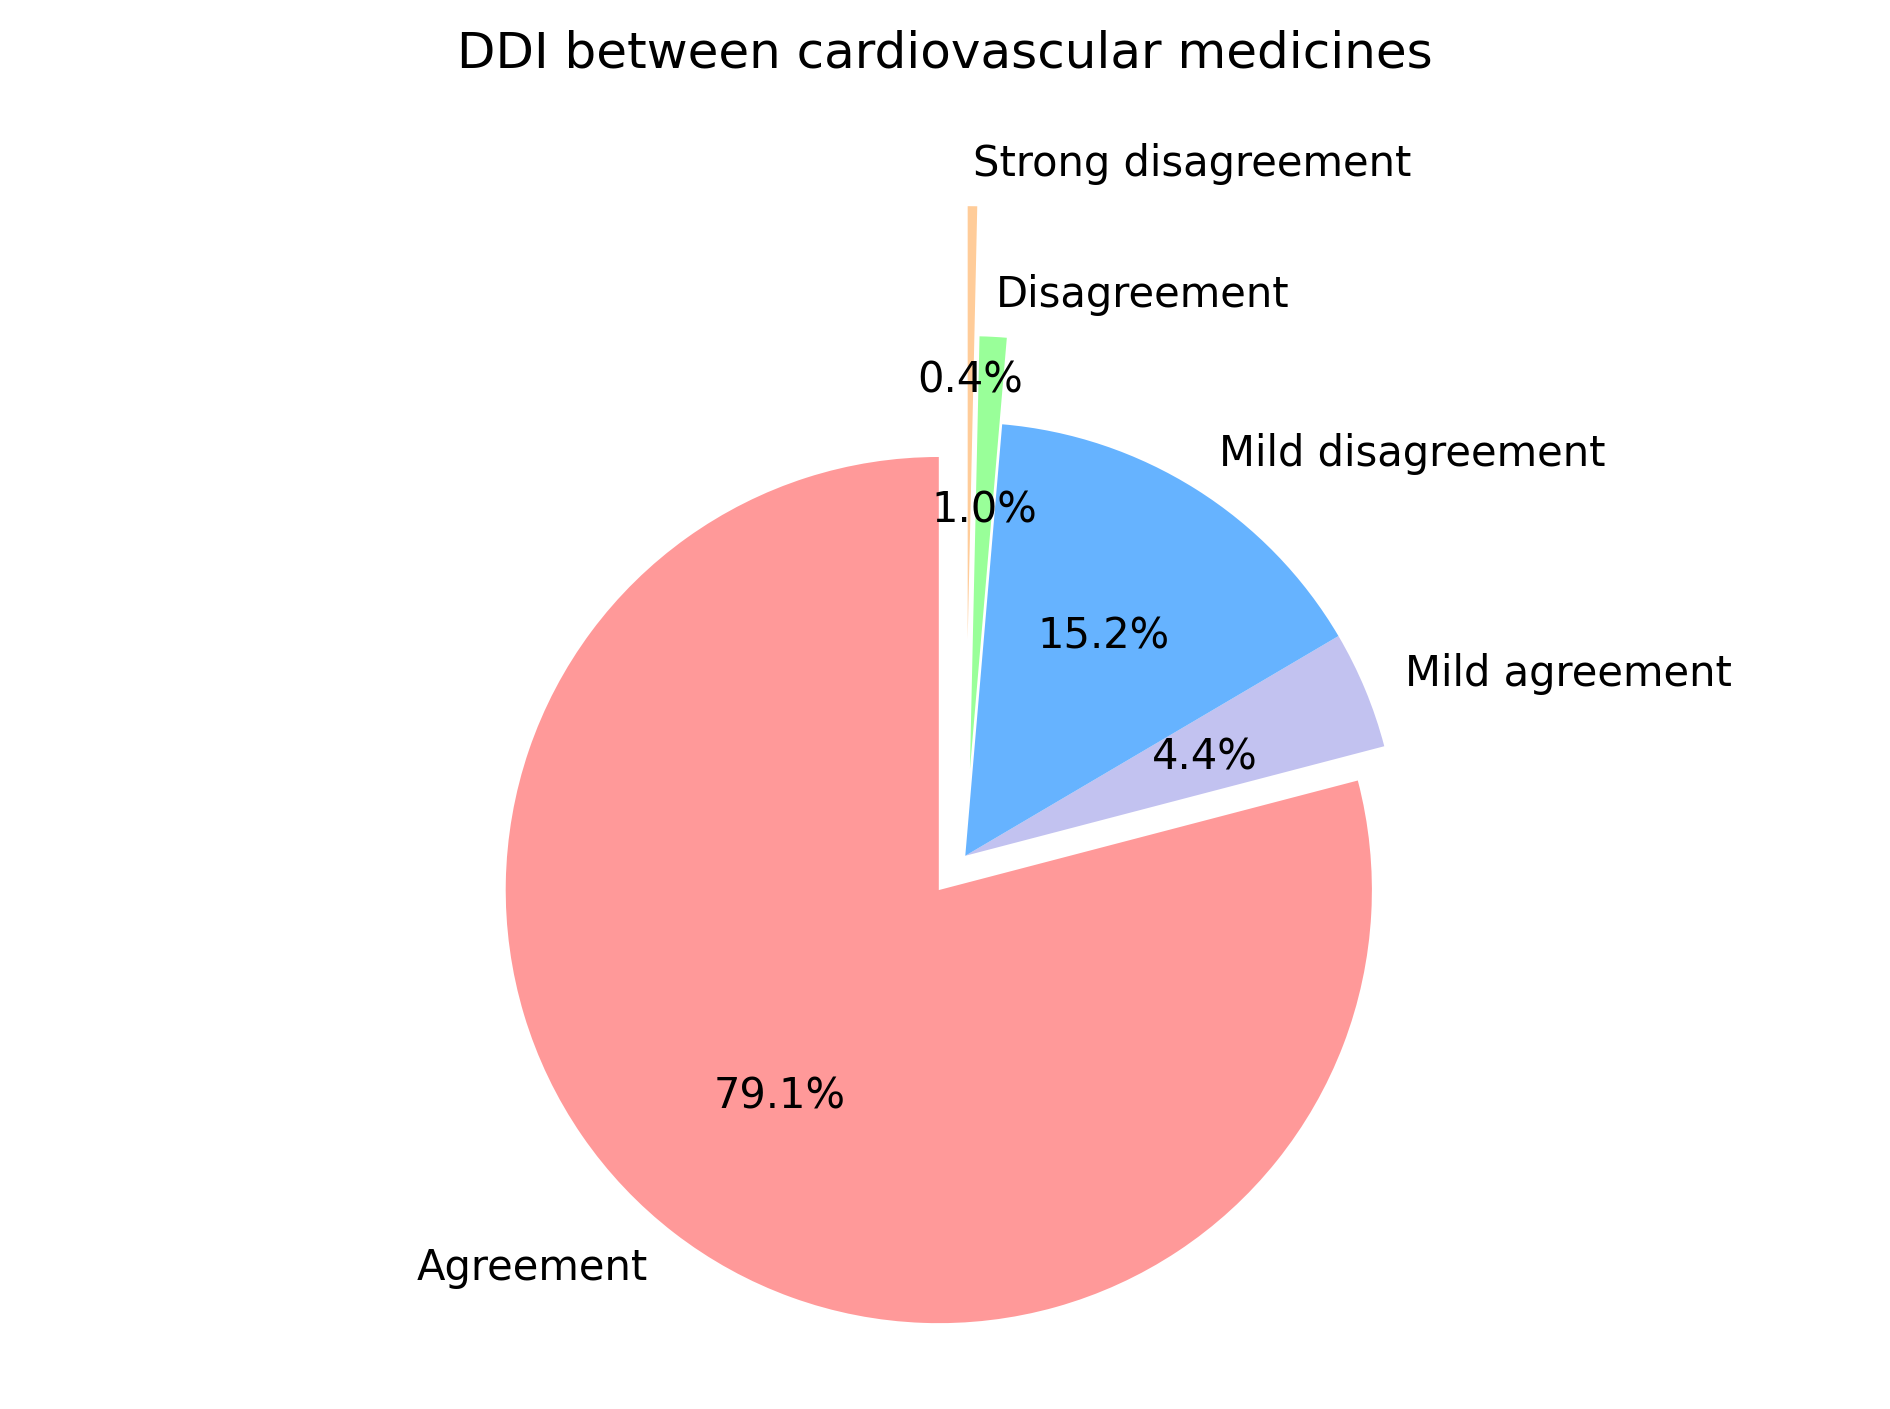

<Figure size 1920x1440 with 0 Axes>

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
matplotlib.rcParams["figure.dpi"] = 300
# Pie chart
labels = ['Agreement', 'Mild agreement', 'Mild disagreement', 'Disagreement', 'Strong disagreement']
sizes = [6056, 337, 1162, 77, 27]
#colors
colors = ['#ff9999','#c2c2f0','#66b3ff','#99ff99','#ffcc99']
explode = [0.1, 0, 0, 0.2, 0.5] 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, shadow=False, autopct='%1.1f%%', startangle=90, explode=explode)
ax1.set_title('DDI between cardiovascular medicines', y=1.0, pad=+20)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
ax1.axis('equal')  
plt.tight_layout()
plt.show()
output_file_png = os.path.join(IMAGE_OUTPUT_DIRECTORY, "cardiovascular-overall.png")
plt.savefig(output_file_png, dpi=300)

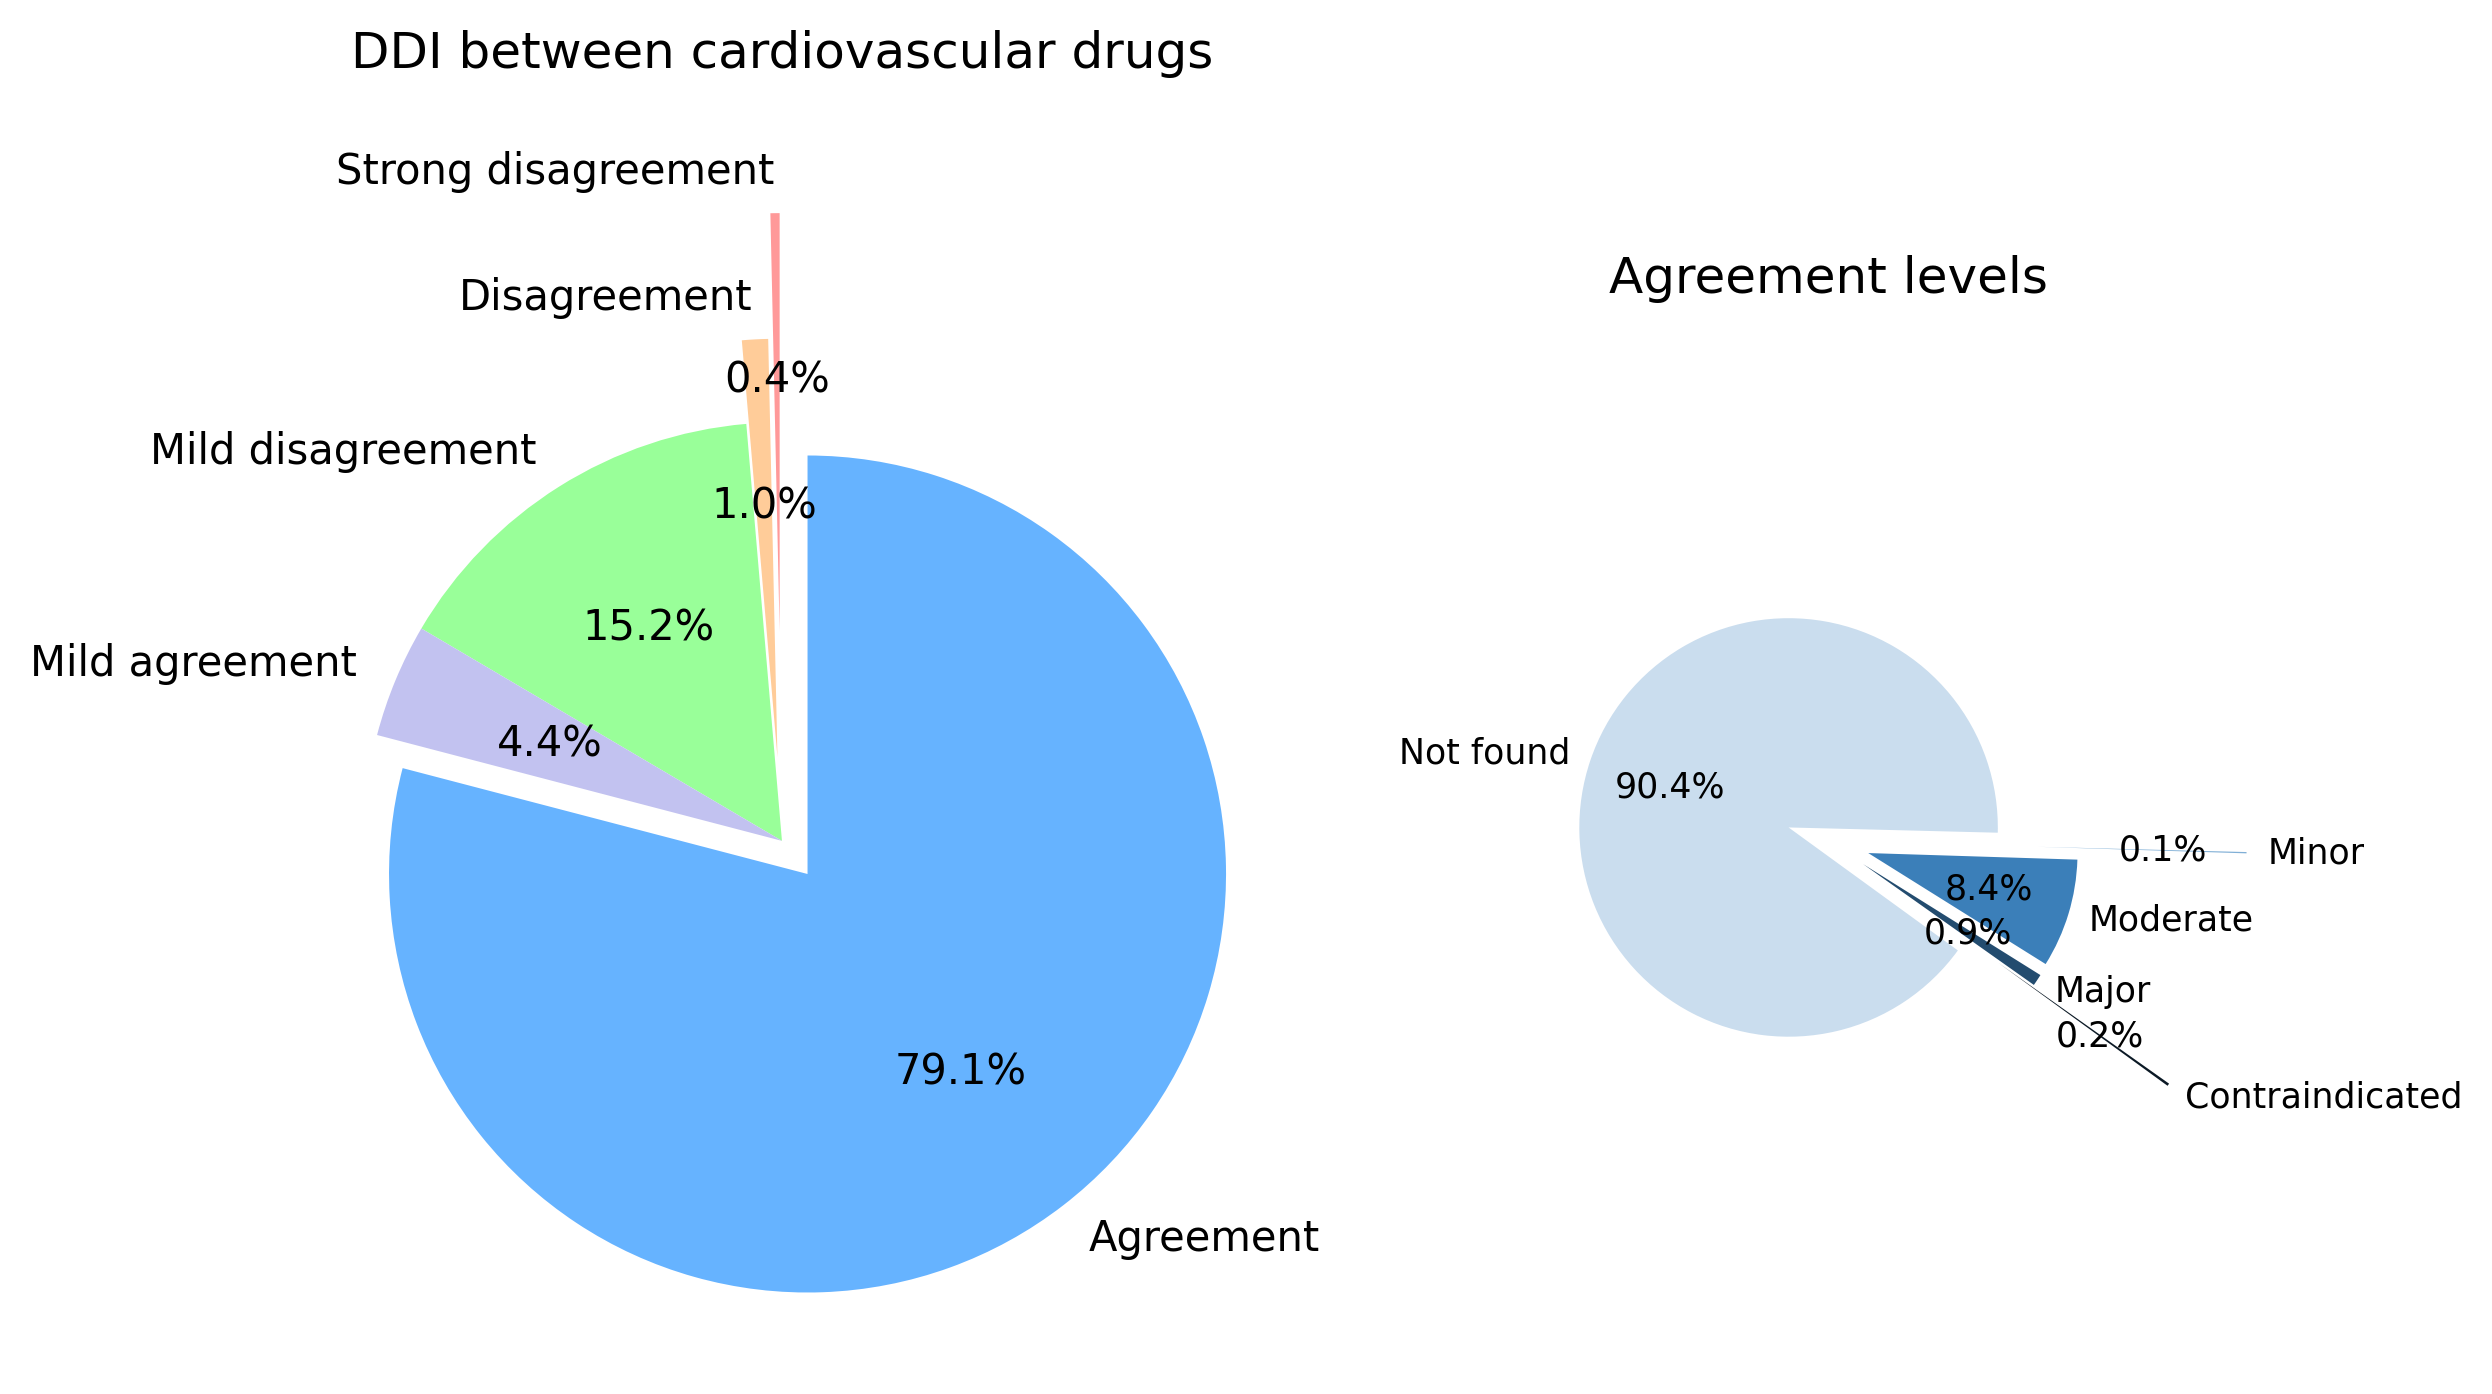

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# large pie chart parameters
labels = ['Strong disagreement','Disagreement','Mild disagreement','Mild agreement','Agreement']
sizes = [27, 77, 1162, 337, 6056]
colors = ['#ff9999','#ffcc99','#99ff99','#c2c2f0','#66b3ff']
explode = [0.5, 0.2, 0, 0, 0.1]
ratios = [0.2, 0.9, 8.4, 0.1, 90.4] 
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(sizes, colors=colors, labels=labels, shadow=False, autopct='%1.1f%%', startangle=90, explode=explode)
# small pie chart parameters
labels1 = ['Contraindicated', 'Major', 'Moderate', 'Minor', 'Not found']
colors1 = ['#0b1925', '#234c6f', '#3b7fb9', '#80afd6', '#caddee'] 
explode1 = [0.5, 0.1, 0.1, 0.5, 0.1]
width = .5

ax2.pie(ratios, autopct='%1.1f%%', startangle=angle, colors=colors1, explode=explode1,
        labels=labels1, radius=0.5, textprops={'size': 'small'})

ax1.set_title('DDI between cardiovascular drugs', y=1.0, pad=+60)
ax2.set_title('Agreement levels')

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

# Cardiovascular with others—overall analysis 

In [9]:
dif2 =[]
for i in range(0, len(my_list_c_o)):
    integer_value_1 = ord(my_list_c_o[i][5]) - ord('0')
    integer_value_2 = ord(my_list_c_o[i][6]) - ord('0')
    dif = abs(integer_value_1 - integer_value_2)
    dif2.append(dif)
print("Agreement: ", dif2.count(0)) 
print("Mild agreement: ", dif2.count(1))  
print("Mild disagreement: ", dif2.count(2))  
print("Disagreement: ", dif2.count(3))
print("Strong disagreement: ", dif2.count(4)) 
print("Number of interactions: ", len(dif2))

Agreement:  6056
Mild agreement:  337
Mild disagreement:  1162
Disagreement:  77
Strong disagreement:  27
Number of interactions:  7659


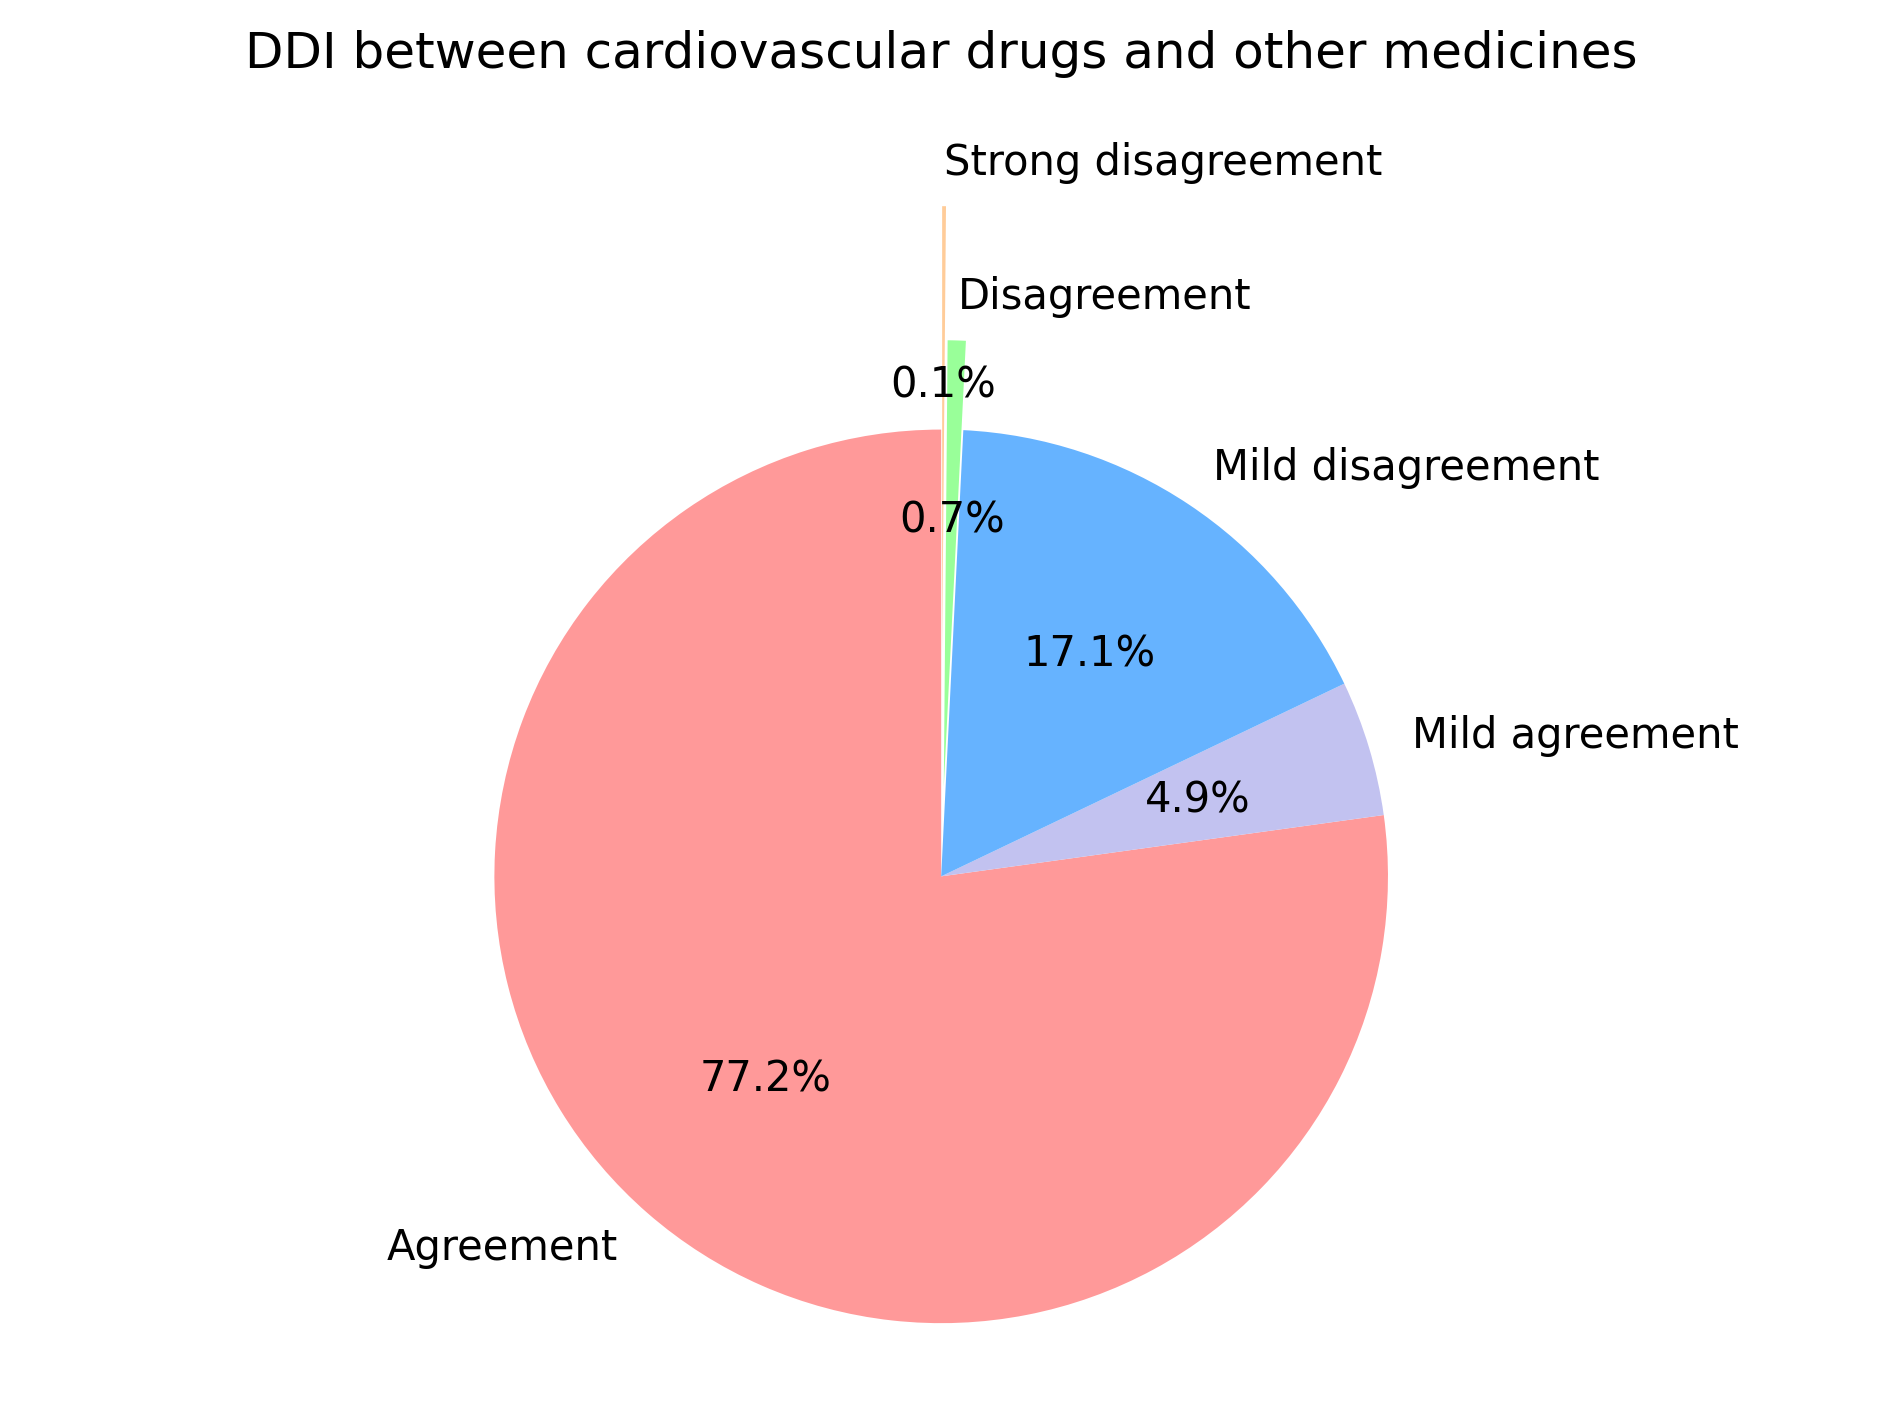

In [10]:
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 300
# Pie chart
labels = ['Agreement', 'Mild agreement', 'Mild disagreement', 'Disagreement', 'Strong disagreement']
sizes = [15169, 964, 3363, 128, 27]
#colors
colors = ['#ff9999','#c2c2f0','#66b3ff','#99ff99','#ffcc99']
explode = [0, 0, 0, 0.2, 0.5] 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, shadow=False, autopct='%1.1f%%', startangle=90, explode=explode)
ax1.set_title('DDI between cardiovascular drugs and other medicines', y=1.0, pad=+20)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [11]:
dif1 =[]
no_agree = 0
no_contra_agree = 0
no_major_agree = 0
no_modera_agree = 0
no_minor_agree = 0
no_notfou_agree = 0
for i in range(0, len(my_list_c_o)):
    integer_value_1 = ord(my_list_c_o[i][5]) - ord('0')
    integer_value_2 = ord(my_list_c_o[i][6]) - ord('0')
    dif = abs(integer_value_1 - integer_value_2)
    dif1.append(dif)
    if my_list_c_o[i][5] == my_list_c_o[i][6]:
        no_agree = no_agree + 1
        if my_list_c_o[i][5] == '4':
            no_contra_agree = no_contra_agree + 1
        elif my_list_c_o[i][5] == '3':
            no_major_agree = no_major_agree + 1
        elif my_list_c_o[i][5] == '2':
            no_modera_agree = no_modera_agree + 1
        elif my_list_c_o[i][5] == '1':
            no_minor_agree = no_minor_agree + 1
        else:
            no_notfou_agree = no_notfou_agree + 1
print("Agreement: ", dif1.count(0)) 
print("Mild agreement: ", dif1.count(1))  
print("Mild disagreement: ", dif1.count(2))  
print("Disagreement: ", dif1.count(3))
print("Strong disagreement: ", dif1.count(4))  
print("Number of interactions: ", len(dif1))
print("Number of agreements: ", no_agree)
print("Agreements of contraindicated: ", no_contra_agree, " representing ", (no_contra_agree * 100)/no_agree, "%")
print("Agreements of major: ", no_major_agree, " representing ", (no_major_agree * 100)/no_agree, "%")
print("Agreements of moderate: ", no_modera_agree, " representing ", (no_modera_agree * 100)/no_agree, "%")
print("Agreements of minor: ", no_minor_agree, " representing ", (no_minor_agree * 100)/no_agree, "%")
print("Agreements of not found: ", no_notfou_agree, " representing ", (no_notfou_agree * 100)/no_agree, "%")

Agreement:  6056
Mild agreement:  337
Mild disagreement:  1162
Disagreement:  77
Strong disagreement:  27
Number of interactions:  7659
Number of agreements:  6056
Agreements of contraindicated:  12  representing  0.19815059445178335 %
Agreements of major:  52  representing  0.8586525759577279 %
Agreements of moderate:  508  representing  8.388375165125495 %
Agreements of minor:  8  representing  0.13210039630118892 %
Agreements of not found:  5476  representing  90.4227212681638 %


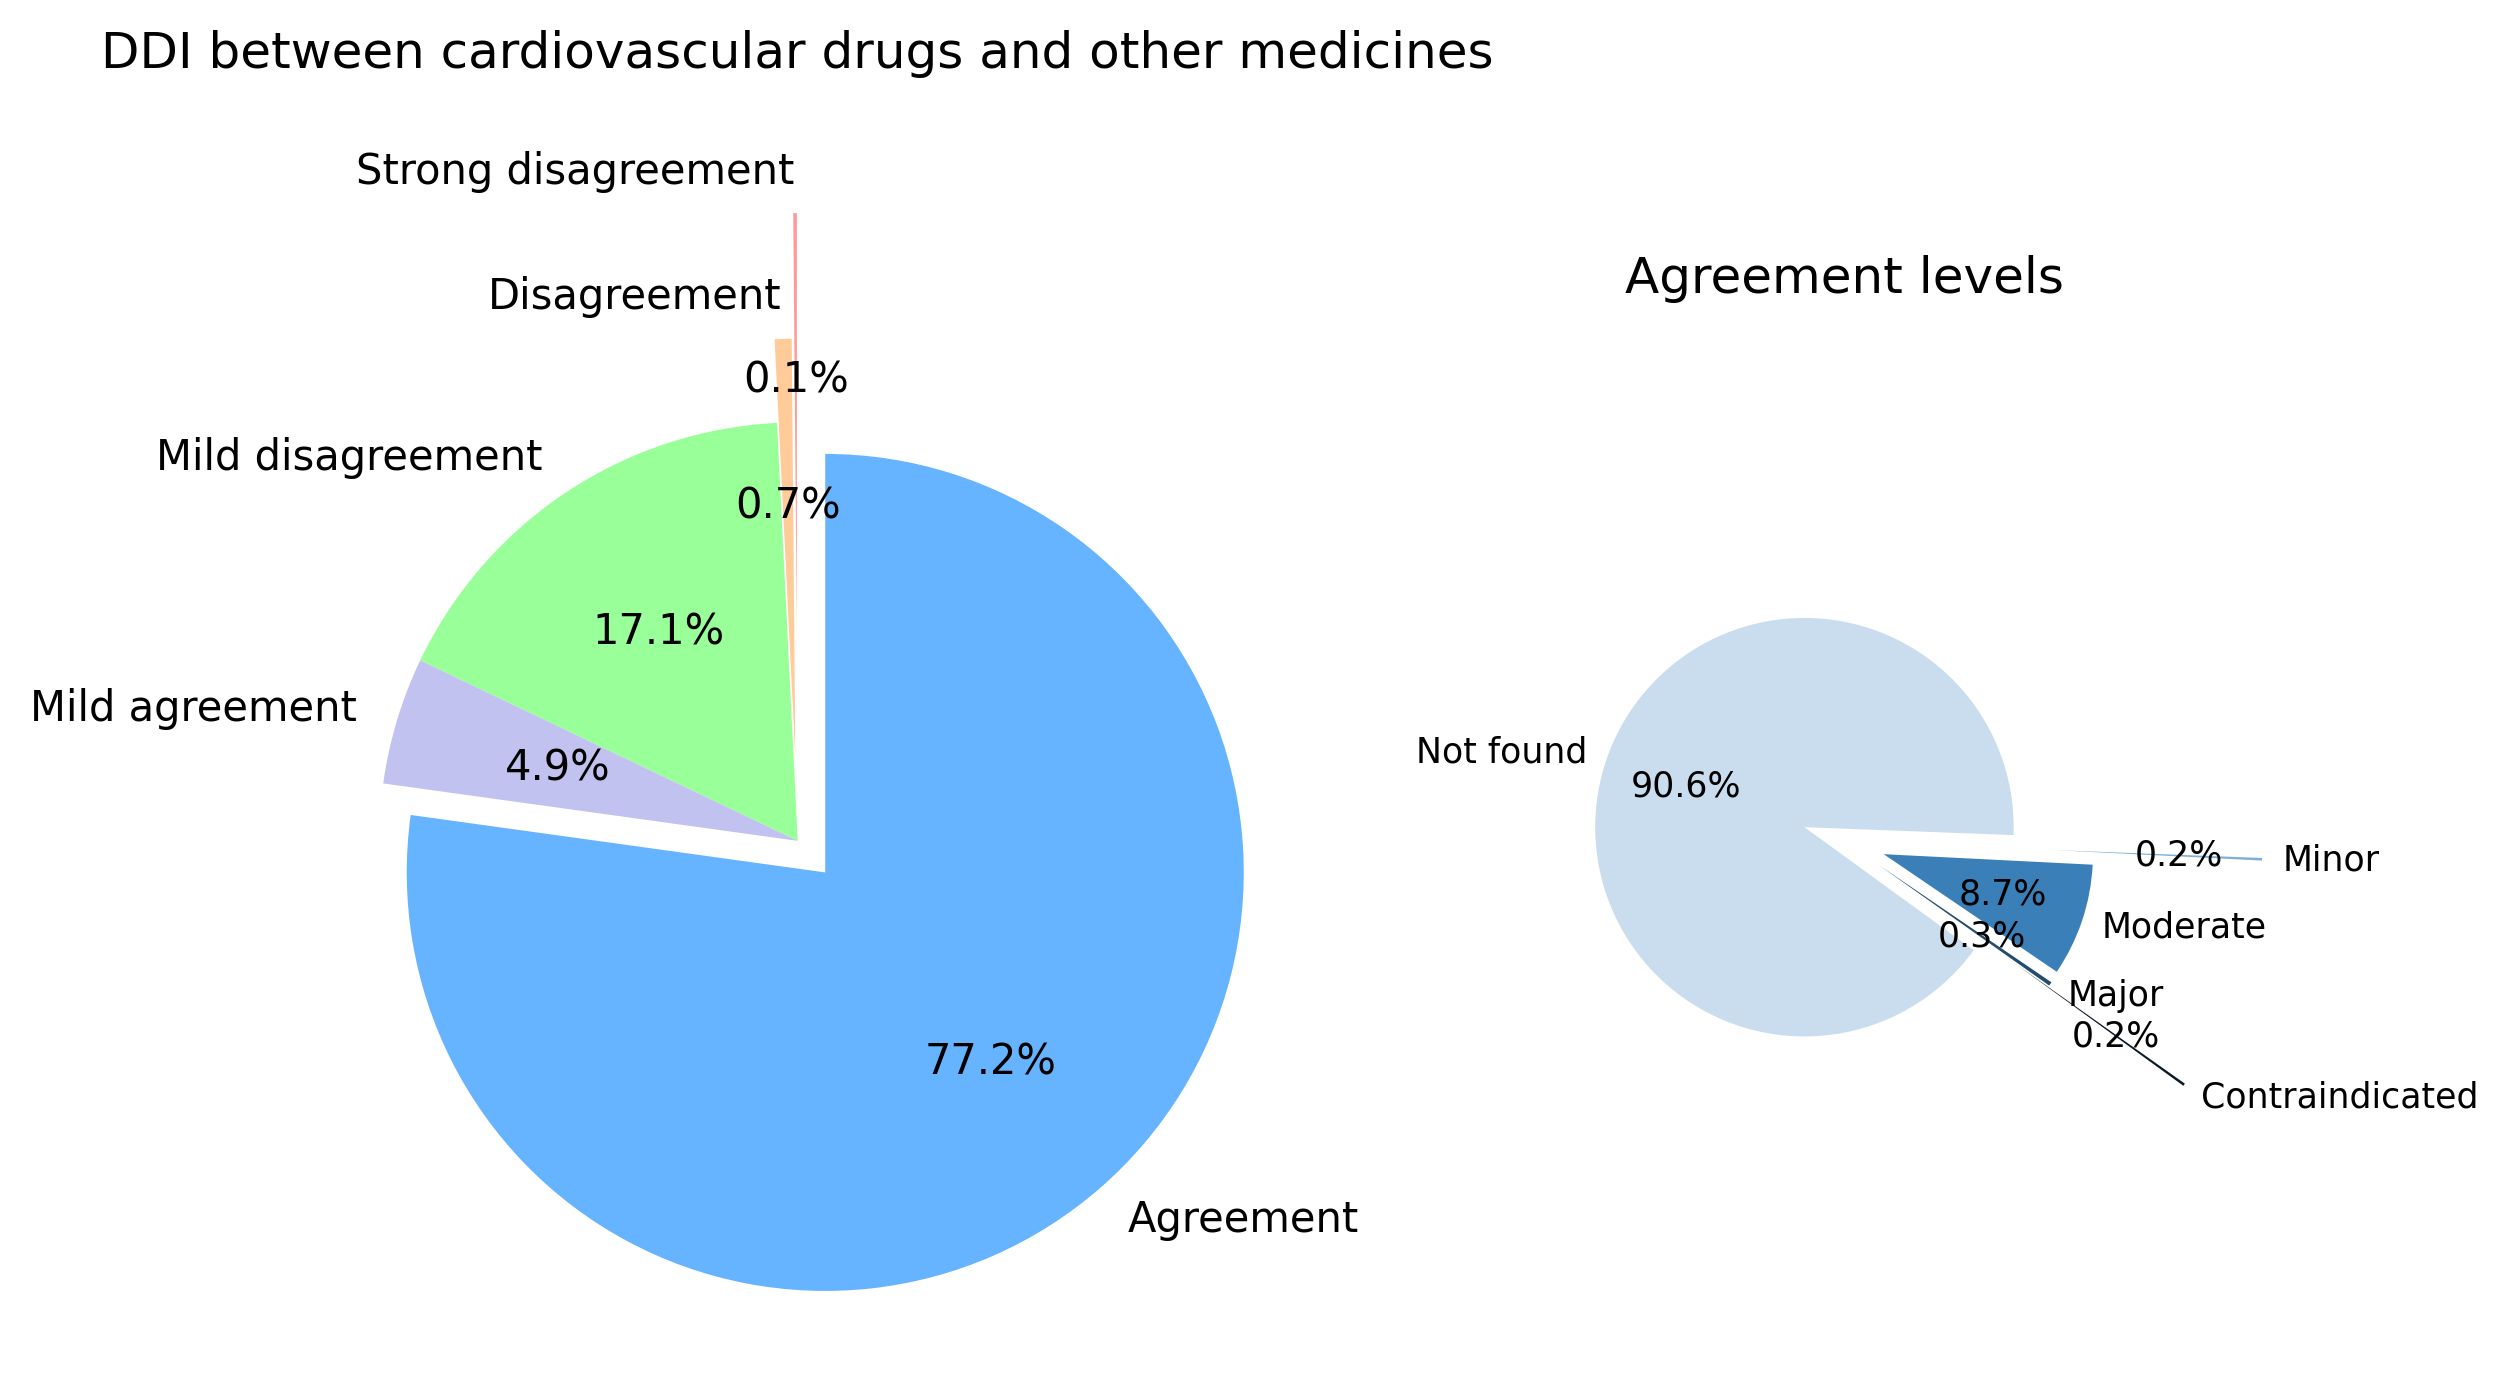

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# large pie chart parameters
labels = ['Strong disagreement','Disagreement','Mild disagreement','Mild agreement','Agreement']
sizes = [27, 128, 3363, 964, 15169]
colors = ['#ff9999','#ffcc99','#99ff99','#c2c2f0','#66b3ff']
explode = [0.5, 0.2, 0, 0, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(sizes, colors=colors, labels=labels, shadow=False, autopct='%1.1f%%', startangle=90, explode=explode)
# small pie chart parameters
ratios = [0.2, 0.3, 8.7, 0.2, 90.6] 
labels1 = ['Contraindicated', 'Major', 'Moderate', 'Minor', 'Not found']
colors1 = ['#0b1925', '#234c6f', '#3b7fb9', '#80afd6', '#caddee'] 
explode1 = [0.5, 0.1, 0.1, 0.5, 0.1]
width = .5

ax2.pie(ratios, autopct='%1.1f%%', startangle=angle, colors=colors1, explode=explode1,
        labels=labels1, radius=0.5, textprops={'size': 'small'})

ax1.set_title('DDI between cardiovascular drugs and other medicines', y=1.0, pad=+60)
ax2.set_title('Agreement levels')

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

# Cardiovascular with others categories—categorial analysis

In [13]:
cardio_list = ['C01', 'C02', 'C03', 'C04', 'C07', 'C08', 'C09', 'C10']
others_list = ['A02', 'A10', 'A12', 'B01', 'G04', 'M01', 'M04', 'N05A', 'N05BC', 'N06A', 'N06BD']
for i in cardio_list:
    for j in others_list:
        no_interactions = 0
        no_contra_agree = 0
        no_major_agree = 0
        no_modera_agree = 0
        no_minor_agree = 0
        no_notfou_agree = 0
        no_disagreement = 0
        for k in range(0, len(my_list_c_o)):
            if (my_list_c_o[k][1] == i) and (my_list_c_o[k][3] == j):
                no_interactions = no_interactions + 1
                if (my_list_c_o[k][5] == my_list_c_o[k][6]):
                    if (my_list_c_o[k][5] == '4'):
                        no_contra_agree = no_contra_agree + 1
                    elif (my_list_c_o[k][5] == '3'):
                        no_major_agree = no_major_agree + 1
                    elif (my_list_c_o[k][5] == '2'):
                        no_modera_agree = no_modera_agree + 1
                    elif (my_list_c_o[k][5] == '1'):
                        no_minor_agree = no_minor_agree + 1
                    else:
                        no_notfou_agree = no_notfou_agree + 1
                else:
                    no_disagreement = no_disagreement + 1
        print ("Between ", i, " and ", j)
        print ("Number of interactions: ", no_interactions)
        print ("Number of contraindicated agreements: ", no_contra_agree, " meaning ", (no_contra_agree * 100)/no_interactions,"%")
        print ("Number of major agreements: ", no_major_agree, " meaning ", (no_major_agree * 100)/no_interactions,"%")
        print ("Number of moderate agreements: ", no_modera_agree, " meaning ", (no_modera_agree * 100)/no_interactions,"%")
        print ("Number of minor agreements: ", no_minor_agree, " meaning ", (no_minor_agree * 100)/no_interactions,"%")
        print ("Number of not found agreements: ", no_notfou_agree, " meaning ", (no_notfou_agree * 100)/no_interactions,"%")
        print ("Number of disagreements: ", no_disagreement, " meaning ", (no_disagreement * 100)/no_interactions,"%")

Between  C01  and  A02
Number of interactions:  0


ZeroDivisionError: division by zero

In [16]:
dataCO = [[0.001976284584980237, 0.0, 0.003952569169960474, 0.005928853754940712, 0.875494071146245, 0.11264822134387352],
          [0.0,0.0,0.039641943734015346,0.002557544757033248, 0.7506393861892583, 0.2071611253196931],
          [0.0, 0.0, 0.029411764705882355, 0.0, 0.8529411764705883, 0.11764705882352942],
          [0.00062111801242236024, 0.0043478260869565216, 0.010559006211180124, 0.0, 0.8807453416149069, 0.10372670807453416],
          [0.0042016806722689076, 0.0042016806722689076, 0.025210084033613445, 0.0, 0.7941176470588235, 0.1722689075630252],
          [0.0, 0.0, 0.019668737060041408, 0.0, 0.9089026915113871, 0.07142857142857143],
          [0.0, 0.019607843137254901, 0.009803921568627451, 0.0, 0.9362745098039215, 0.034313725490196076],
          [0.014492753623188406, 0.016908212560386473, 0.007246376811594203, 0.0, 0.673913043478261, 0.28743961352657006],
          [0.0021739130434782608, 0.0010869565217391304, 0.007608695652173914, 0.0, 0.8065217391304348, 0.1826086956521739],
          [0.039215686274509802, 0.009803921568627451, 0.05555555555555555, 0.0, 0.506535947712418, 0.38888888888888886],
          [0.0, 0.0, 0.017647058823529411, 0.005882352941176471, 0.7117647058823529, 0.26470588235294116],
          
          [0.0, 0.0, 0.0, 0.0, 0.9917355371900827, 0.008264462809917356],
          [0.0, 0.0, 0.003952569169960474, 0.023715415019762847, 0.8339920948616601, 0.1383399209486166],
          [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
          [0.0, 0.0, 0.020779220779220777, 0.0, 0.8883116883116882, 0.09090909090909092],
          [0.0, 0.0, 0.064935064935064934, 0.0, 0.7272727272727273, 0.2077922077922078],
          [0.0, 0.0, 0.13852813852813853, 0.0, 0.774891774891775, 0.08658008658008658],
          [0.0, 0.0, 0.0, 0.0, 0.9696969696969697, 0.030303030303030303],
          [0.0, 0.0, 0.08080808080808081, 0.0, 0.2222222222222222, 0.696969696969697],
          [0.0, 0.0, 0.018181818181818181, 0.0, 0.4, 0.5818181818181818],
          [0.0, 0.0, 0.0, 0.0, 0.48484848484848484, 0.51515151515151516],
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
          
          [0.0, 0.0, 0.006060606060606061, 0.0, 0.6545454545454545, 0.3393939393939394],
          [0.0, 0.0, 0.031884057971014492, 0.0, 0.44927536231884055, 0.5188405797101449],
          [0.0, 0.0, 0.033333333333333335, 0.0, 0.33333333333333336, 0.63333333333333336],
          [0.0, 0.0, 0.017142857142857142, 0.0, 0.8, 0.18285714285714285],
          [0.0, 0.0, 0.0, 0.0, 0.7047619047619048, 0.29523809523809526],
          [0.0, 0.0, 0.5936507936507937, 0.0, 0.29841269841269842, 0.10793650793650794],
          [0.0, 0.0, 0.0, 0.0, 0.8, 0.2],
          [0.0, 0.0, 0.0, 0.0, 0.2888888888888889, 0.7111111111111111],
          [0.0, 0.003333333333333333, 0.0, 0.006666666666666666, 0.52, 0.47],
          [0.0, 0.007407407407407407, 0.0, 0.0, 0.33333333333333336, 0.6592592592592592],
          [0.0, 0.0, 0.0, 0.04, 0.8666666666666667, 0.09333333333333334],
          
          [0.0, 0.0, 0.02272727272727273, 0.0, 0.9772727272727273, 0.0],
          [0.0, 0.0, 0.07608695652173913, 0.0, 0.5652173913043478, 0.35869565217391305],
          [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
          [0.0, 0.0, 0.7142857142857143, 0.0, 0.6928571428571429, 0.3],
          [0.0, 0.0, 0.14285714285714286, 0.0, 0.4642857142857143, 0.39285714285714285],
          [0.0, 0.0, 0.0, 0.0, 0.8095238095238095, 0.19047619047619047],
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
          [0.0, 0.0, 0.0, 0.0, 0.58333333333333336, 0.41666666666666664],
          [0.0, 0.0, 0.0, 0.0, 0.7375, 0.2625],
          [0.0, 0.0, 0.0, 0.0, 0.7777777777777777, 0.2222222222222222],
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
          
          [0.0, 0.0, 0.02097902097902098, 0.0, 0.8041958041958041, 0.17482517482517483],
          [0.0, 0.0, 0.14715719063545151, 0.0033444816053511706, 0.4715719063545151, 0.37792642140468224],
          [0.0, 0.0, 0.0, 0.0, 0.5384615384615385, 0.4615384615384615],
          [0.0, 0.0021978021978021978, 0.0021978021978021978, 0.0, 0.7824175824175825, 0.21318681318681318],
          [0.0, 0.0, 0.56043956043956044, 0.0, 0.42857142857142854, 0.01098901098901099],
          [0.0, 0.0, 0.8095238095238095, 0.0, 0.19047619047619047, 0.0],
          [0.0, 0.012820512820512822, 0.0, 0.0, 0.9871794871794872, 0.0],
          [0.8547008547008547, 0.0, 0.0, 0.0, 0.21367521367521366, 0.7777777777777777],
          [0.0, 0.0, 0.11923076923076923, 0.0, 0.3230769230769231, 0.5576923076923077],
          [0.04273504273504273, 0.0, 0.0, 0.0, 0.4017094017094017, 0.5555555555555556],
          [0.0, 0.0, 0.0, 0.0, 0.4, 0.6],
          
          [0.0, 0.0, 0.02479338842975207, 0.0, 0.8760330578512396, 0.09917355371900827],
          [0.0, 0.0, 0.02766798418972332, 0.003952569169960474, 0.8932806324110672, 0.07509881422924901],
          [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
          [0.0, 0.002597402597402597, 0.018181818181818181, 0.0, 0.7324675324675324, 0.24675324675324674],
          [0.0, 0.0, 0.14285714285714286, 0.0, 0.4025974025974026, 0.4545454545454545],
          [0.0, 0.0, 0.07359307359307359, 0.0, 0.30303030303030305, 0.6233766233766234],
          [0.0, 0.030303030303030303, 0.030303030303030303, 0.0, 0.8484848484848484, 0.09090909090909092],
          [0.0, 0.0, 0.08080808080808081, 0.0, 0.2222222222222222, 0.696969696969697],
          [0.0, 0.0, 0.036363636363636362, 0.0, 0.2409090909090909, 0.7227272727272727],
          [0.0, 0.0, 0.1111111111111111, 0.0, 0.32323232323232325, 0.5656565656565657],
          [0.0, 0.0, 0.018181818181818181, 0.0, 0.3636363636363637, 0.6181818181818182],
          
          [0.0, 0.0, 0.0, 0.0, 0.9808612440191388, 0.019138755980861244],
          [0.0, 0.0, 0.38215102974828376, 0.0, 0.517162471395881, 0.10068649885583524],
          [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
          [0.0, 0.0, 0.1037593984962406, 0.0, 0.6947368421052632, 0.20150375939849624],
          [0.0, 0.0, 0.2781954887218045, 0.0, 0.6842105263157895, 0.037593984962406015],
          [0.0, 0.0, 0.3834586466165413, 0.0, 0.18796992481203006, 0.42857142857142854],
          [0.0, 0.03508771929824561, 0.0, 0.08771929824561404, 0.8245614035087719, 0.052631578947368425],
          [0.0, 0.0, 0.3508771929824561, 0.0, 0.2631578947368421, 0.7017543859649123],
          [0.0, 0.0, 0.015789473684210527, 0.0, 0.468421052631579, 0.51578947368421055],
          [0.0, 0.0, 0.011695906432748537, 0.005847953216374269, 0.53801169590643276, 0.4444444444444444],
          [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
          
          [0.0, 0.0, 0.0, 0.0, 0.8636363636363636, 0.13636363636363637],
          [0.0, 0.0024154589371980675, 0.10869565217391305, 0.0, 0.7294685990338164, 0.15942028985507246],
          [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
          [0.0015873015873015872, 0.0015873015873015872, 0.011111111111111112, 0.0015873015873015872, 0.9365079365079364, 0.04761904761904762],
          [0.0, 0.0, 0.0, 0.0, 0.9603174603174604, 0.039682539682539684],
          [0.0, 0.0, 0.0026455026455026454, 0.0026455026455026454, 0.8439153439153439, 0.15079365079365079],
          [0.0, 0.06481481481481482, 0.009259259259259259, 0.0, 0.8333333333333333, 0.0925925925925926],
          [0.0, 0.0, 0.0, 0.0, 0.9753086419753086, 0.024691358024691357],
          [0.0, 0.0, 0.011111111111111112, 0.0, 0.9305555555555556, 0.05833333333333333],
          [0.0, 0.0, 0.0, 0.0, 0.8765432098765432, 0.12345679012345679],
          [0.0, 0.0, 0.011111111111111112, 0.0, 0.9777777777777777, 0.011111111111111112]]

dataA02_1 =[[0.001976284584980237, 0.0, 0.003952569169960474, 0.005928853754940712, 0.875494071146245, 0.11264822134387352], 
            [0.0, 0.0, 0.0, 0.0, 0.9917355371900827, 0.008264462809917356], 
            [0.0, 0.0, 0.006060606060606061, 0.0, 0.6545454545454545, 0.3393939393939394], 
            [0.0, 0.0, 0.02272727272727273, 0.0, 0.9772727272727273, 0.0]]

dataA02_2 =[[0.0, 0.0, 0.02097902097902098, 0.0, 0.8041958041958041, 0.17482517482517483], 
            [0.0, 0.0, 0.02479338842975207, 0.0, 0.8760330578512396, 0.09917355371900827], 
            [0.0, 0.0, 0.0, 0.0, 0.9808612440191388, 0.019138755980861244], 
            [0.0, 0.0, 0.0, 0.0, 0.8636363636363636, 0.13636363636363637]]

dataA10_1 =[[0.0,0.0,0.039641943734015346,0.002557544757033248, 0.7506393861892583, 0.2071611253196931],
            [0.0, 0.0, 0.003952569169960474, 0.023715415019762847, 0.8339920948616601, 0.1383399209486166],
            [0.0, 0.0, 0.031884057971014492, 0.0, 0.44927536231884055, 0.5188405797101449],
            [0.0, 0.0, 0.07608695652173913, 0.0, 0.5652173913043478, 0.35869565217391305]]

dataA10_2 =[[0.0, 0.0, 0.14715719063545151, 0.0033444816053511706, 0.4715719063545151, 0.37792642140468224],
            [0.0, 0.0, 0.02766798418972332, 0.003952569169960474, 0.8932806324110672, 0.07509881422924901],
            [0.0, 0.0, 0.38215102974828376, 0.0, 0.517162471395881, 0.10068649885583524],
            [0.0, 0.0024154589371980675, 0.10869565217391305, 0.0, 0.7294685990338164, 0.15942028985507246]]

dataA12_1 =[[0.0, 0.0, 0.029411764705882355, 0.0, 0.8529411764705883, 0.11764705882352942],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
            [0.0, 0.0, 0.033333333333333335, 0.0, 0.33333333333333336, 0.63333333333333336],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0]]

dataA12_2 =[[0.0, 0.0, 0.0, 0.0, 0.5384615384615385, 0.4615384615384615],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0]]
            
dataB01_1 =[[0.00062111801242236024, 0.0043478260869565216, 0.010559006211180124, 0.0, 0.8807453416149069, 0.10372670807453416],
            [0.0, 0.0, 0.020779220779220777, 0.0, 0.8883116883116882, 0.09090909090909092],
            [0.0, 0.0, 0.017142857142857142, 0.0, 0.8, 0.18285714285714285],
            [0.0, 0.0, 0.7142857142857143, 0.0, 0.6928571428571429, 0.3]]
            
dataB01_2 =[[0.0, 0.0021978021978021978, 0.0021978021978021978, 0.0, 0.7824175824175825, 0.21318681318681318],
            [0.0, 0.002597402597402597, 0.018181818181818181, 0.0, 0.7324675324675324, 0.24675324675324674],
            [0.0, 0.0, 0.1037593984962406, 0.0, 0.6947368421052632, 0.20150375939849624],
            [0.0015873015873015872, 0.0015873015873015872, 0.011111111111111112, 0.0015873015873015872, 0.9365079365079364, 0.04761904761904762]]
          
            
          

In [17]:
dataA02_1 =[[0.001976284584980237, 0.0, 0.003952569169960474, 0.005928853754940712, 0.875494071146245, 0.11264822134387352], 
            [0.0, 0.0, 0.0, 0.0, 0.9917355371900827, 0.008264462809917356], 
            [0.0, 0.0, 0.006060606060606061, 0.0, 0.6545454545454545, 0.3393939393939394], 
            [0.0, 0.0, 0.02272727272727273, 0.0, 0.9772727272727273, 0.0]]

dataA10_1 =[[0.0,0.0,0.039641943734015346,0.002557544757033248, 0.7506393861892583, 0.2071611253196931],
            [0.0, 0.0, 0.003952569169960474, 0.023715415019762847, 0.8339920948616601, 0.1383399209486166],
            [0.0, 0.0, 0.031884057971014492, 0.0, 0.44927536231884055, 0.5188405797101449],
            [0.0, 0.0, 0.07608695652173913, 0.0, 0.5652173913043478, 0.35869565217391305]]

dataA12_1 =[[0.0, 0.0, 0.029411764705882355, 0.0, 0.8529411764705883, 0.11764705882352942],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
            [0.0, 0.0, 0.033333333333333335, 0.0, 0.33333333333333336, 0.63333333333333336],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0]]

dataB01_1 =[[0.00062111801242236024, 0.0043478260869565216, 0.010559006211180124, 0.0, 0.8807453416149069, 0.10372670807453416],
            [0.0, 0.0, 0.020779220779220777, 0.0, 0.8883116883116882, 0.09090909090909092],
            [0.0, 0.0, 0.017142857142857142, 0.0, 0.8, 0.18285714285714285],
            [0.0, 0.0, 0.7142857142857143, 0.0, 0.6928571428571429, 0.3]]

dataO1 =  [[[0.001976284584980237, 0.0, 0.003952569169960474, 0.005928853754940712, 0.875494071146245, 0.11264822134387352], 
            [0.0, 0.0, 0.0, 0.0, 0.9917355371900827, 0.008264462809917356], 
            [0.0, 0.0, 0.006060606060606061, 0.0, 0.6545454545454545, 0.3393939393939394], 
            [0.0, 0.0, 0.02272727272727273, 0.0, 0.9772727272727273, 0.0]], 
          [[0.0,0.0,0.039641943734015346,0.002557544757033248, 0.7506393861892583, 0.2071611253196931],
            [0.0, 0.0, 0.003952569169960474, 0.023715415019762847, 0.8339920948616601, 0.1383399209486166],
            [0.0, 0.0, 0.031884057971014492, 0.0, 0.44927536231884055, 0.5188405797101449],
            [0.0, 0.0, 0.07608695652173913, 0.0, 0.5652173913043478, 0.35869565217391305]],
          [[0.0, 0.0, 0.029411764705882355, 0.0, 0.8529411764705883, 0.11764705882352942],
            [0.0, 0.0, 0.0, 0.0, 1, 0.0],
            [0.0, 0.0, 0.033333333333333335, 0.0, 0.33333333333333336, 0.63333333333333336],
            [0.0, 0.0, 0.0, 0.0, 1, 0.0]],
          [[0.00062111801242236024, 0.0043478260869565216, 0.010559006211180124, 0.0, 0.8807453416149069, 0.10372670807453416],
            [0.0, 0.0, 0.020779220779220777, 0.0, 0.8883116883116882, 0.09090909090909092],
            [0.0, 0.0, 0.017142857142857142, 0.0, 0.8, 0.18285714285714285],
            [0.0, 0.0, 0.7142857142857143, 0.0, 0.6928571428571429, 0.3]],
          [[0.0042016806722689076, 0.0042016806722689076, 0.025210084033613445, 0.0, 0.7941176470588235, 0.1722689075630252],
           [0.0, 0.0, 0.064935064935064934, 0.0, 0.7272727272727273, 0.2077922077922078],
           [0.0, 0.0, 0.0, 0.0, 0.7047619047619048, 0.29523809523809526],
           [0.0, 0.0, 0.14285714285714286, 0.0, 0.4642857142857143, 0.39285714285714285]],
          [[0.0, 0.0, 0.019668737060041408, 0.0, 0.9089026915113871, 0.07142857142857143],
           [0.0, 0.0, 0.13852813852813853, 0.0, 0.774891774891775, 0.08658008658008658],
           [0.0, 0.0, 0.5936507936507937, 0.0, 0.29841269841269842, 0.10793650793650794],
           [0.0, 0.0, 0.0, 0.0, 0.8095238095238095, 0.19047619047619047]],
          [[0.0, 0.019607843137254901, 0.009803921568627451, 0.0, 0.9362745098039215, 0.034313725490196076],
           [0.0, 0.0, 0.0, 0.0, 0.9696969696969697, 0.030303030303030303],
           [0.0, 0.0, 0.0, 0.0, 0.8, 0.2],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
          [[0.014492753623188406, 0.016908212560386473, 0.007246376811594203, 0.0, 0.673913043478261, 0.28743961352657006],
           [0.0, 0.0, 0.08080808080808081, 0.0, 0.2222222222222222, 0.696969696969697],
           [0.0, 0.0, 0.0, 0.0, 0.2888888888888889, 0.7111111111111111],
           [0.0, 0.0, 0.0, 0.0, 0.58333333333333336, 0.41666666666666664]],
          [[0.0021739130434782608, 0.0010869565217391304, 0.007608695652173914, 0.0, 0.8065217391304348, 0.1826086956521739],
           [0.0, 0.0, 0.018181818181818181, 0.0, 0.4, 0.5818181818181818],
           [0.0, 0.003333333333333333, 0.0, 0.006666666666666666, 0.52, 0.47],
           [0.0, 0.0, 0.0, 0.0, 0.7375, 0.2625]],
          [[0.039215686274509802, 0.009803921568627451, 0.05555555555555555, 0.0, 0.506535947712418, 0.38888888888888886],
           [0.0, 0.0, 0.0, 0.0, 0.48484848484848484, 0.51515151515151516],
           [0.0, 0.007407407407407407, 0.0, 0.0, 0.33333333333333336, 0.6592592592592592],
           [0.0, 0.0, 0.0, 0.0, 0.7777777777777777, 0.2222222222222222]],
          [[0.0, 0.0, 0.017647058823529411, 0.005882352941176471, 0.7117647058823529, 0.26470588235294116],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           [0.0, 0.0, 0.0, 0.04, 0.8666666666666667, 0.09333333333333334],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]] 
           
           

dataA02_2 =[[0.0, 0.0, 0.02097902097902098, 0.0, 0.8041958041958041, 0.17482517482517483], 
            [0.0, 0.0, 0.02479338842975207, 0.0, 0.8760330578512396, 0.09917355371900827], 
            [0.0, 0.0, 0.0, 0.0, 0.9808612440191388, 0.019138755980861244], 
            [0.0, 0.0, 0.0, 0.0, 0.8636363636363636, 0.13636363636363637]]

dataA10_2 =[[0.0, 0.0, 0.14715719063545151, 0.0033444816053511706, 0.4715719063545151, 0.37792642140468224],
            [0.0, 0.0, 0.02766798418972332, 0.003952569169960474, 0.8932806324110672, 0.07509881422924901],
            [0.0, 0.0, 0.38215102974828376, 0.0, 0.517162471395881, 0.10068649885583524],
            [0.0, 0.0024154589371980675, 0.10869565217391305, 0.0, 0.7294685990338164, 0.15942028985507246]]

dataA12_2 =[[0.0, 0.0, 0.0, 0.0, 0.5384615384615385, 0.4615384615384615],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0]]
                        
dataB01_2 =[[0.0, 0.0021978021978021978, 0.0021978021978021978, 0.0, 0.7824175824175825, 0.21318681318681318],
            [0.0, 0.002597402597402597, 0.018181818181818181, 0.0, 0.7324675324675324, 0.24675324675324674],
            [0.0, 0.0, 0.1037593984962406, 0.0, 0.6947368421052632, 0.20150375939849624],
            [0.0015873015873015872, 0.0015873015873015872, 0.011111111111111112, 0.0015873015873015872, 0.9365079365079364, 0.04761904761904762]]
def main():
    createPieCharts(dataO1)
    return 0

def createPieCharts(dataO1,piecharts_fname="piecharts-tst1.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C01','C02','C03','C04']
    thresholds = ['A02','A10','A12','B01','G04']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataO1[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        #plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [18]:
dataO1_2=[[[0.0, 0.0, 0.019668737060041408, 0.0, 0.9089026915113871, 0.07142857142857143],
           [0.0, 0.0, 0.13852813852813853, 0.0, 0.774891774891775, 0.08658008658008658],
           [0.0, 0.0, 0.5936507936507937, 0.0, 0.29841269841269842, 0.10793650793650794],
           [0.0, 0.0, 0.0, 0.0, 0.8095238095238095, 0.19047619047619047]],
          [[0.0, 0.019607843137254901, 0.009803921568627451, 0.0, 0.9362745098039215, 0.034313725490196076],
           [0.0, 0.0, 0.0, 0.0, 0.9696969696969697, 0.030303030303030303],
           [0.0, 0.0, 0.0, 0.0, 0.8, 0.2],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
          [[0.014492753623188406, 0.016908212560386473, 0.007246376811594203, 0.0, 0.673913043478261, 0.28743961352657006],
           [0.0, 0.0, 0.08080808080808081, 0.0, 0.2222222222222222, 0.696969696969697],
           [0.0, 0.0, 0.0, 0.0, 0.2888888888888889, 0.7111111111111111],
           [0.0, 0.0, 0.0, 0.0, 0.58333333333333336, 0.41666666666666664]],
          [[0.0021739130434782608, 0.0010869565217391304, 0.007608695652173914, 0.0, 0.8065217391304348, 0.1826086956521739],
           [0.0, 0.0, 0.018181818181818181, 0.0, 0.4, 0.5818181818181818],
           [0.0, 0.003333333333333333, 0.0, 0.006666666666666666, 0.52, 0.47],
           [0.0, 0.0, 0.0, 0.0, 0.7375, 0.2625]],
          [[0.039215686274509802, 0.009803921568627451, 0.05555555555555555, 0.0, 0.506535947712418, 0.38888888888888886],
           [0.0, 0.0, 0.0, 0.0, 0.48484848484848484, 0.51515151515151516],
           [0.0, 0.007407407407407407, 0.0, 0.0, 0.33333333333333336, 0.6592592592592592],
           [0.0, 0.0, 0.0, 0.0, 0.7777777777777777, 0.2222222222222222]],
          [[0.0, 0.0, 0.017647058823529411, 0.005882352941176471, 0.7117647058823529, 0.26470588235294116],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           [0.0, 0.0, 0.0, 0.04, 0.8666666666666667, 0.09333333333333334],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]]
def main():
    createPieCharts(dataO1_2)
    return 0

def createPieCharts(dataO1_2,piecharts_fname="piecharts-tst-tst.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C01','C02','C03','C04']
    thresholds = ['M01','M04','N05-1','N05-2','N06-1','N06-2']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataO1_2[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [19]:
dataO2_1=[[[0.0, 0.0, 0.02097902097902098, 0.0, 0.8041958041958041 , 0.17482517482517483],
           [0.0, 0.0, 0.02479338842975207 , 0.0, 0.8760330578512396 , 0.09917355371900827],
           [0.0, 0.0, 0.0, 0.0, 0.9808612440191388, 0.019138755980861244],
           [0.0, 0.0, 0.0, 0.0, 0.8636363636363636, 0.13636363636363637]],
          [[0.0, 0.0, 0.14715719063545151, 0.0033444816053511706, 0.4715719063545151, 0.37792642140468224],
           [0.0, 0.0, 0.02766798418972332, 0.003952569169960474, 0.8932806324110672, 0.07509881422924901],
           [0.0, 0.0, 0.38215102974828376, 0.0, 0.517162471395881, 0.10068649885583524],
           [0.0, 0.0024154589371980675, 0.10869565217391305, 0.0, 0.7294685990338164, 0.15942028985507246]],
          [[0.0, 0.0, 0.0, 0.0, 0.5384615384615385, 0.4615384615384615],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
          [[0.0, 0.0021978021978021978, 0.0021978021978021978, 0.0, 0.7824175824175825, 0.21318681318681318],
           [0.0, 0.002597402597402597, 0.018181818181818181, 0.0, 0.7324675324675324, 0.24675324675324674],
           [0.0, 0.0, 0.1037593984962406, 0.0, 0.6947368421052632, 0.20150375939849624],
           [0.0015873015873015872, 0.0015873015873015872, 0.011111111111111112, 0.0015873015873015872, 0.9365079365079364, 0.04761904761904762]],
          [[0.0, 0.0, 0.56043956043956044, 0.0, 0.42857142857142854, 0.01098901098901099],
           [0.0, 0.0, 0.14285714285714286, 0.0, 0.4025974025974026, 0.4545454545454545],
           [0.0, 0.0, 0.2781954887218045, 0.0, 0.6842105263157895, 0.037593984962406015],
           [0.0, 0.0, 0.0, 0.0, 0.9603174603174604, 0.039682539682539684]]]
def main():
    createPieCharts(dataO2_1)
    return 0

def createPieCharts(dataO2_1,piecharts_fname="piecharts-C7-C10-A2-G4.pdf"):
    """ """
    import datetime
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C07','C08','C09','C10']
    thresholds = ['A02','A10','A12','B01','G04']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataO2_1[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [20]:
dataO2_2=[[[0.0, 0.0, 0.8095238095238095, 0.0, 0.19047619047619047, 0.0],
           [0.0, 0.0, 0.07359307359307359, 0.0, 0.30303030303030305, 0.6233766233766234],
           [0.0, 0.0, 0.3834586466165413, 0.0, 0.18796992481203006, 0.42857142857142854],
           [0.0, 0.0, 0.0026455026455026454, 0.0026455026455026454, 0.8439153439153439, 0.15079365079365079]],
          [[0.0, 0.012820512820512822, 0.0, 0.0, 0.9871794871794872, 0.0],
           [0.0, 0.030303030303030303, 0.030303030303030303, 0.0, 0.8484848484848484, 0.09090909090909092],
           [0.0, 0.03508771929824561, 0.0, 0.08771929824561404, 0.8245614035087719, 0.052631578947368425],
           [0.0, 0.06481481481481482, 0.009259259259259259, 0.0, 0.8333333333333333, 0.0925925925925926]],
          [[0.008547008547008547, 0.0, 0.0, 0.0, 0.21367521367521366, 0.7777777777777777],
           [0.0, 0.0, 0.08080808080808081, 0.0, 0.2222222222222222, 0.696969696969697],
           [0.0, 0.0, 0.03508771929824561, 0.0, 0.2631578947368421, 0.7017543859649123],
           [0.0, 0.0, 0.0, 0.0, 0.9753086419753086, 0.024691358024691357]],
          [[0.0, 0.0, 0.11923076923076923, 0.0, 0.3230769230769231, 0.5576923076923077],
           [0.0, 0.0, 0.036363636363636362, 0.0, 0.2409090909090909, 0.7227272727272727],
           [0.0, 0.0, 0.015789473684210527, 0.0, 0.468421052631579, 0.51578947368421055],
           [0.0, 0.0, 0.011111111111111112, 0.0, 0.9305555555555556, 0.05833333333333333]],
          [[0.04273504273504273, 0.0, 0.0, 0.0, 0.4017094017094017, 0.5555555555555556],
           [0.0, 0.0, 0.1111111111111111, 0.0, 0.32323232323232325, 0.5656565656565657],
           [0.0, 0.0, 0.011695906432748537, 0.005847953216374269, 0.53801169590643276, 0.4444444444444444],
           [0.0, 0.0, 0.0, 0.0, 0.8765432098765432, 0.12345679012345679]],
          [[0.0, 0.0, 0.0, 0.0, 0.4, 0.6],
           [0.0, 0.0, 0.018181818181818181, 0.0, 0.3636363636363637, 0.6181818181818182],
           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           [0.0, 0.0, 0.011111111111111112, 0.0, 0.9777777777777777, 0.011111111111111112]]]
def main():
    createPieCharts(dataO2_2)
    return 0

def createPieCharts(dataO2_2,piecharts_fname="piecharts-C7-C10-M1-N62.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C07','C08','C09','C10']
    thresholds = ['M01','M04','N05-1','N05-2','N06-1','N06-2']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataO2_2[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [21]:
dataC1_1=[[[0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
           [0.0, 0.0, 0.015810276679841897, 0.0, 0.8656126482213439 , 0.11857707509881424],
           [0.002898550724637681, 0.0014492753623188406 , 0.04057971014492754 , 0.0014492753623188406, 0.7681159420289855 , 0.1855072463768116],
           [0.0, 0.0, 0.005434782608695652, 0.0, 0.9184782608695652 , 0.076502732240437155]],
          [[0.0, 0.0, 0.015810276679841897, 0.0, 0.8656126482213439 , 0.11857707509881424],
           [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
           [0.0, 0.0, 0.0, 0.0, 0.6242424242424242, 0.3757575757575758],
           [0.0, 0.0, 0.0, 0.0, 0.6363636363636363, 0.3636363636363637]],
          [[0.002898550724637681, 0.0014492753623188406 , 0.04057971014492754 , 0.0014492753623188406, 0.7681159420289855 , 0.1855072463768116],
           [0.0, 0.0, 0.0, 0.0, 0.6242424242424242, 0.3757575757575758],
           [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
           [0.0, 0.0, 0.0, 0.0, 0.7666666666666667, 0.23333333333333332]],
          [[0.0, 0.0, 0.005434782608695652, 0.0, 0.9184782608695652 , 0.076502732240437155],
           [0.0, 0.0, 0.0, 0.0, 0.6363636363636363, 0.3636363636363637],
           [0.0, 0.0, 0.0, 0.0, 0.7666666666666667, 0.23333333333333332],
           [0.00, 0.00, 0.00, 0.00, 0.00, 0.00]]]
def main():
    createPieCharts(dataC1_1)
    return 0

def createPieCharts(dataC1_1,piecharts_fname="piecharts-C1-C4-C1-C4.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C01','C02','C03','C04']
    thresholds = ['C01','C02','C03','C04']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataC1_1[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.legend(labels, loc='center left', bbox_to_anchor=(-6.1, 4.54), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3229: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/tmp/ipykernel_1756/1782505496.py:31: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(piecharts_fname) as pdf:


RuntimeError: In affine_transform: Invalid vertices array.

ValueError: need at least one array to concatenate

<Figure size 1920x1440 with 20 Axes>

In [22]:
dataC1_2=[[[0.008361204013377926, 0.01839464882943144, 0.12040133779264215, 0.0, 0.4882943143812709, 0.3645484949832776],
           [0.0, 0.005928853754940712, 0.021739130434782608, 0.0, 0.7569169960474308, 0.21541501976284586],
           [0.0, 0.0, 0.037757437070938216, 0.0, 0.8237986270022883 , 0.13844393592677346],
           [0.0012062726176115803, 0.003618817852834741, 0.008443908323281062, 0.0, 0.9372738238841978, 0.04945717732207479]],
          [[0.0, 0.05594405594405594, 0.25874125874125873, 0.0, 0.4685314685314685, 0.21678321678321677],
           [0.0, 0.0, 0.04958677685950414, 0.0, 0.652892561983471, 0.2975206611570248],
           [0.0, 0.0, 0.09090909090909092, 0.0, 0.6842105263157895, 0.2248803827751196],
           [0.0, 0.0, 0.0, 0.0, 0.9444444444444444, 0.05555555555555555]],
          [[0.0, 0.0, 0.48717948717948715, 0.0, 0.17435897435897434, 0.3384615384615385],
           [0.0, 0.006060606060606061, 0.012121212121212122, 0.0, 0.696969696969697, 0.28484848484848484],
           [0.0, 0.0, 0.23859649122807017, 0.0, 0.15087719298245615, 0.6105263157894737],
           [0.007407407407407407, 0.0, 0.02962962962962963, 0.0, 0.8851851851851852, 0.07777777777777778]],
          [[0.0, 0.0, 0.0, 0.0, 0.5, 0.5],
           [0.0, 0.0, 0.02272727272727273, 0.0, 0.75, 0.22727272727272727],
           [0.0, 0.0, 0.15789473684210526, 0.0, 0.618421052631579, 0.2236842105263158],
           [0.0, 0.05555555555555555, 0.0, 0.0, 0.875, 0.06944444444444445]]]
def main():
    createPieCharts(dataC1_2)
    return 0

def createPieCharts(dataC1_2,piecharts_fname="piecharts-C1-C4-C7-C10.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    areas = ['C07','C08','C09','C10']
    thresholds = ['C01','C02','C03','C04']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataC1_2[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-6.1, 4.54), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [23]:
dataC2_1=[[[0.008361204013377926, 0.01839464882943144, 0.12040133779264215, 0.0, 0.4882943143812709, 0.3645484949832776],
           [0.0, 0.05594405594405594, 0.25874125874125873, 0.0, 0.4685314685314685, 0.21678321678321677],
           [0.0, 0.0, 0.48717948717948715, 0.0, 0.17435897435897434, 0.3384615384615385],
           [0.0, 0.0, 0.0, 0.0, 0.5, 0.5]],
          [[0.0, 0.005928853754940712, 0.021739130434782608, 0.0, 0.7569169960474308, 0.21541501976284586],
           [0.0, 0.0, 0.04958677685950414, 0.0, 0.652892561983471, 0.2975206611570248],
           [0.0, 0.006060606060606061, 0.012121212121212122, 0.0, 0.696969696969697, 0.28484848484848484],
           [0.0, 0.0, 0.02272727272727273, 0.0, 0.75, 0.22727272727272727]],
          [[0.0, 0.0, 0.037757437070938216, 0.0, 0.8237986270022883, 0.13844393592677346],
           [0.0, 0.0, 0.09090909090909092, 0.0, 0.6842105263157895, 0.2248803827751196],
           [0.0, 0.0, 0.23859649122807017, 0.0, 0.15087719298245615, 0.6105263157894737],
           [0.0, 0.0, 0.15789473684210526, 0.0, 0.618421052631579, 0.2236842105263158]],
          [[0.0012062726176115803, 0.003618817852834741, 0.008443908323281062, 0.0, 0.9372738238841978, 0.04945717732207479],
           [0.0, 0.0, 0.0, 0.0, 0.9444444444444444, 0.05555555555555555],
           [0.007407407407407407, 0.0, 0.02962962962962963, 0.0, 0.8851851851851852, 0.07777777777777778],
           [0.0, 0.05555555555555555, 0.0, 0.0, 0.875, 0.06944444444444445]]]
def main():
    createPieCharts(dataC2_1)
    return 0

def createPieCharts(dataC2_1,piecharts_fname="piecharts-C7-C10-C1-C4.pdf"):
    """ """
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    areas = ['C01','C02','C03','C04']
    thresholds = ['C07','C08','C09','C10']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataC2_1[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-6.1, 4.54), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

In [24]:
dataC2_2=[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           [0.0, 0.11188811188811188, 0.5314685314685315, 0.0, 0.0, 0.3566433566433567],
           [0.0, 0.0, 0.05668016194331984, 0.0, 0.50607287449392715, 0.437246963562753],
           [0.0, 0.0, 0.0, 0.0, 0.9615384615384616, 0.038461538461538463]],
          [[0.0, 0.11188811188811188, 0.5314685314685315, 0.0, 0.0, 0.3566433566433567],
           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           [0.0, 0.0, 0.004784688995215311, 0.009569377990430622, 0.53110047846889955, 0.4545454545454545],
           [0.010101010101010102, 0.02525252525252525, 0.02525252525252525, 0.02525252525252525, 0.8232323232323232, 0.09090909090909092]],
          [[0.0, 0.0, 0.05668016194331984, 0.0, 0.50607287449392715, 0.437246963562753],
           [0.010101010101010102, 0.02525252525252525, 0.02525252525252525, 0.02525252525252525, 0.8232323232323232, 0.09090909090909092],
           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           [0.0, 0.0, 0.011695906432748537, 0.0, 0.847953216374269, 0.14035087719298245]],
          [[0.0, 0.0, 0.0, 0.0, 0.9615384615384616, 0.038461538461538463],
           [0.010101010101010102, 0.02525252525252525, 0.02525252525252525, 0.02525252525252525, 0.8232323232323232, 0.09090909090909092],
           [0.0, 0.0, 0.011695906432748537, 0.0, 0.847953216374269, 0.14035087719298245],
           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]
def main():
    createPieCharts(dataC2_2)
    return 0

def createPieCharts(dataC2_2,piecharts_fname="piecharts-C7-C10-C7-C10.pdf"):
    """ """
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import datetime
    from matplotlib.backends.backend_pdf import PdfPages
    piecharts_fname = os.path.join(IMAGE_OUTPUT_DIRECTORY, piecharts_fname)
    import matplotlib.pyplot as plt
    areas = ['C07','C08','C09','C10']
    thresholds = ['C07','C08','C09','C10']
    num_columns = len(areas) + 1                                # Add extra column for text
    num_rows    = len(thresholds)
    with PdfPages(piecharts_fname) as pdf:
        fig, ax = plt.subplots(num_rows,num_columns)
#            fig.suptitle('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
        labels = ['Agreement, contraindicated', 'Agreement, major', 'Agreement, moderate', 'Agreement, minor','Agreement, not found','Disagreement']
        #labels = [' ', ' ', ' ', ' ',' ',' ']
        for i,threshold in enumerate(thresholds):
            fracs = dataC2_2[i]
            ax[i,0].set_axis_off()                                  # Turn off axes & ticks
            ax[i,0].text(0.5,0.5,threshold,ha='center',va='center') # Add text
            for j,area in enumerate(areas):
                if i==0:
                    ax[i,j+1].set_title(area)                           # Add 1 to j index
                ax[i,j+1].pie(fracs[j],                 # Add 1 to j index
                    shadow=True, startangle=90, textprops={'fontsize': 3})
                ax[i,j+1].set_aspect('equal')                       # Add 1 to j index
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-6.1, 4.54), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        #plt.legend(labels, loc='center left', bbox_to_anchor=(-8.05, +5.93), fancybox = True, shadow = False, fontsize = "4", frameon=False)
        ##plt.legend(patches, labels, loc="lower center")
        pdf.savefig(fig)
        plt.close()
        # Adding metadata for PDF file
        d = pdf.infodict()
        d['Title'] = 'Pie charts'
        d['CreationDate'] = datetime.datetime.today()
        
if __name__ == '__main__':
    main()

/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3229: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/tmp/ipykernel_1756/3782440300.py:32: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(piecharts_fname) as pdf:


FileNotFoundError: [Errno 2] No such file or directory: './plots/./plots/piecharts-C7-C10-C7-C10.pdf'

ValueError: need at least one array to concatenate

<Figure size 1920x1440 with 20 Axes>